In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
train_my=pd.read_csv('train.csv')
train_my.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Read Train, Test and submission file data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

test1=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [4]:
test1.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [6]:
# read head records
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
len(train)

891

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:

train[train.Survived == 1]
train[train.Survived==1]['Pclass']
train.loc[train.Survived==1,'Sex']
train.loc[(train.Survived==1) & (train.Sex=='female'),'Pclass'].head()


1    1
2    3
3    1
8    3
9    2
Name: Pclass, dtype: int64

In [12]:
#plot graph of missing values
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 65% are male from the training dataset and 35% are women
2. out of all people 62% died and 38% servived from training data
3. out of all men (0.525/0.647) has died and (0.122/0.647) servived.
4. out of all women (0.090/0.352) has died abd (0.261/0.352) servived.


In [13]:
pd.crosstab(train.Survived,train.Sex,margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
pd.crosstab(train.Survived,train.Pclass,margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [16]:
train[(train.Pclass.isin([1,2,3])) & (train.Sex.isin(['female','male'])) & (train.Survived==1)].shape

(342, 12)

In [17]:
train[(train.Pclass.isin([1,2,3])) & (train.Sex.isin(['female','male'])) & (train.Survived==0)].shape

(549, 12)

In [18]:
(train.Sex).shape

(891,)

In [19]:
#confirm no. of missing values in each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

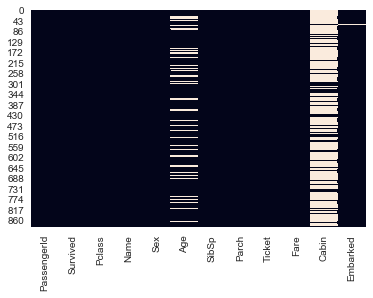

In [21]:
sns.heatmap(train.isnull(), cbar=False)

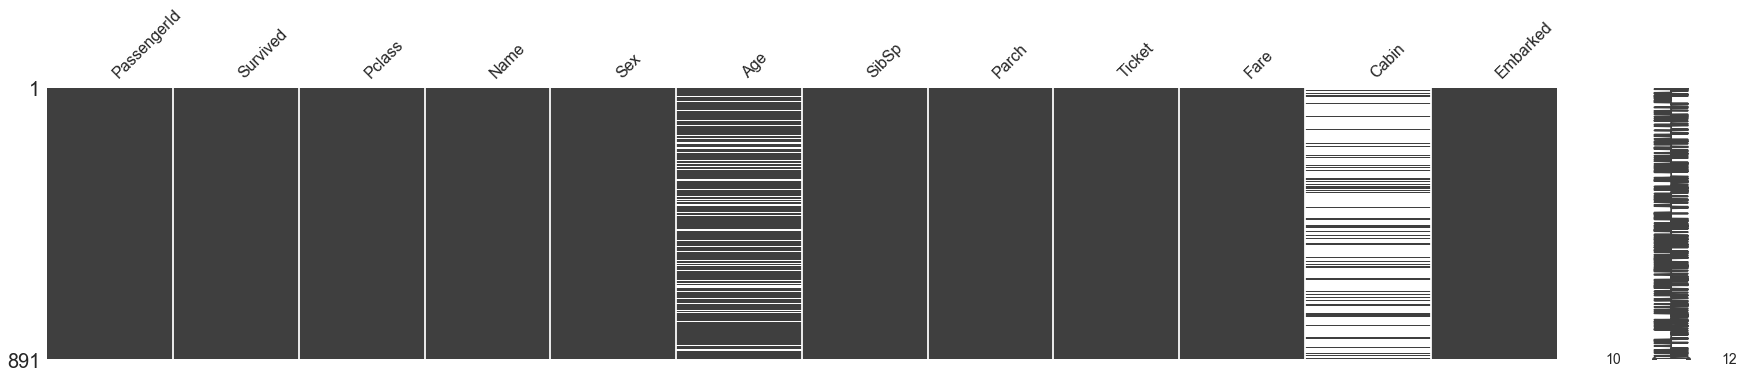

In [22]:
msno.matrix(train, figsize=(30,5))

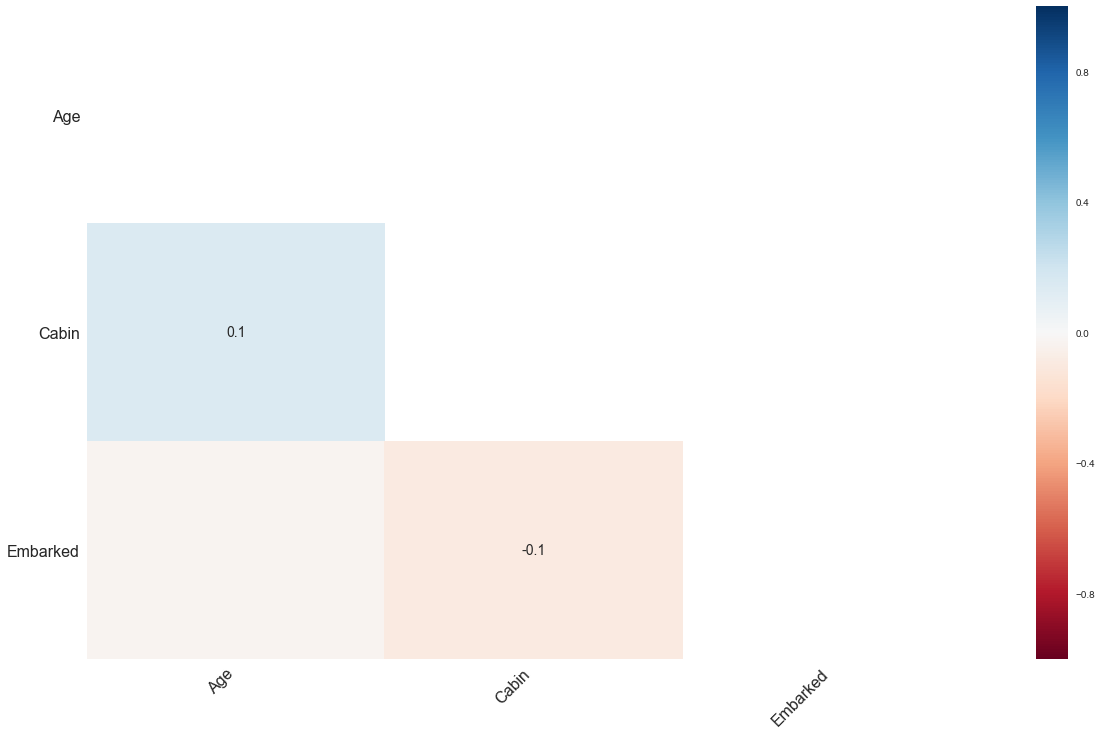

In [23]:
msno.heatmap(train)

In [24]:
(train.head()).dropna()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [25]:
len(train.columns)

12

In [26]:
#To display total no. of missing values per column
def missing_value_no(df, colum):
    missing_value={}
   # print("Number of missing or NaN values for each columns:")
    df_len=len(df)
    for column in colum:
        missing_val=df[column].value_counts().sum()
        missing_value[column]=df_len-missing_val
    return missing_value
missing_values=missing_value_no(train, colum=train.columns)
missing_values

    

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [27]:
missing_values1=missing_value_no(test, colum=test.columns)
missing_values1

{'PassengerId': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 86,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 1,
 'Cabin': 327,
 'Embarked': 0}

In [28]:
#to display the total missing values in the data , the above code also gave the same output
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()
df=pd.DataFrame()

In [30]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


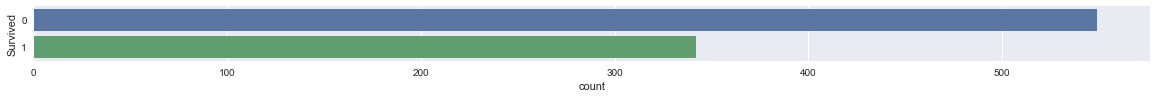

In [31]:
#to print the survived count and print the same
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

In [32]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [33]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


3    491
1    216
2    184
Name: Pclass, dtype: int64


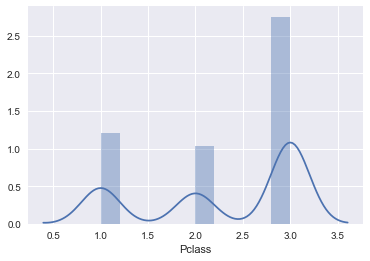

In [34]:
sns.distplot(train.Pclass)
print(train.Pclass.value_counts())

In [35]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [36]:
train.Name.value_counts().head()

Karun, Miss. Manca            1
Nenkoff, Mr. Christo          1
Matthews, Mr. William John    1
Culumovic, Mr. Jeso           1
Naidenoff, Mr. Penko          1
Name: Name, dtype: int64

male      577
female    314
Name: Sex, dtype: int64


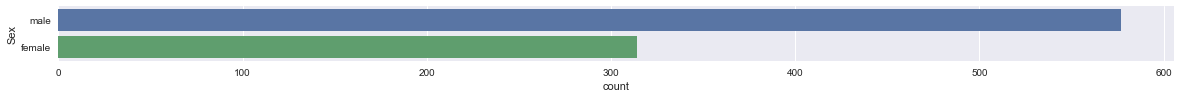

In [37]:
print(train.Sex.value_counts())
fig=plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=train)


In [38]:
missing_values['Sex']

0

In [39]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)
df_con['Sex']=train['Sex']

C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shailendra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


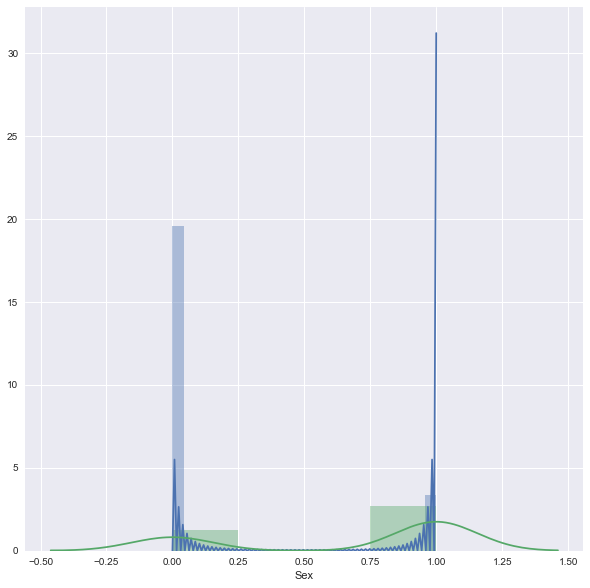

In [40]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'])
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'])

In [41]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [42]:
missing_values['Age']

177

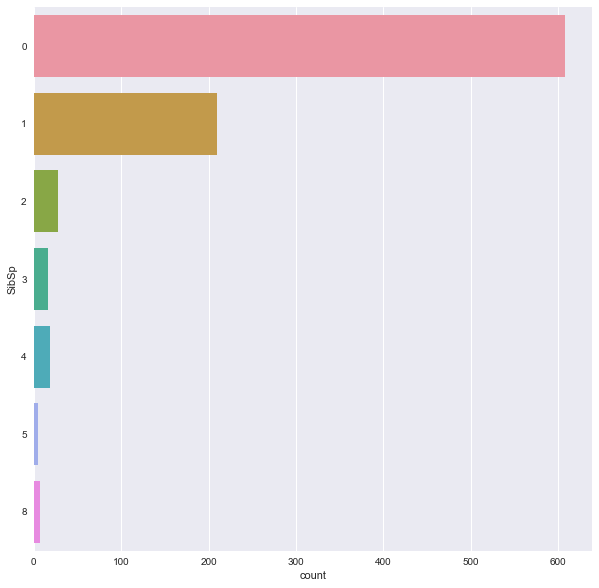

In [43]:
train.SibSp.value_counts()
fig=plt.figure(figsize=(10,10))
sns.countplot(y='SibSp',data=train)


In [44]:
df_bin.head()
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']

In [45]:
df_bin.head()
train.head()
missing_values['Parch']

0

In [46]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

In [47]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


In [48]:
missing_values['Ticket']

0

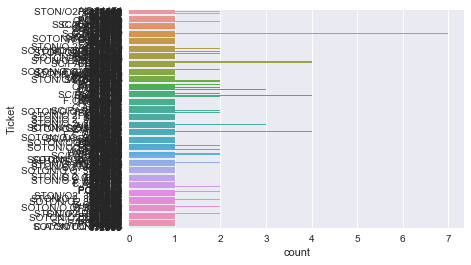

In [49]:
sns.countplot(y='Ticket',data=train)

In [50]:
#not added the Ticket column to df_con and df_bin because it has 681 diff. values


In [51]:
missing_values['Fare']

0

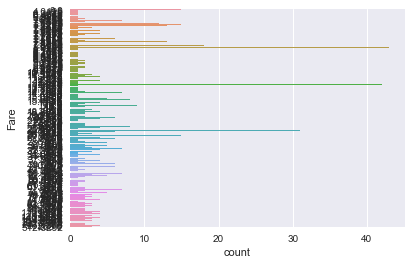

In [52]:
sns.countplot(y='Fare', data=train)

In [53]:
train.Fare.dtype

dtype('float64')

In [54]:
# Fare is a float value so copied to df_con as it is but in df_bin  5 bins are created
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],5) # discretised value

In [55]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [56]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [57]:
train[['Fare','Cabin']].head()

,Fare,Cabin
0,7.2500,NaN
1,71.2833,C85
2,7.9250,NaN
3,53.1000,C123
4,8.0500,NaN


In [58]:
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
df_con['Embarked']=train['Embarked']
df_bin['Embarked']=train['Embarked']

In [60]:
df_con=df_con.dropna(subset=['Embarked'])
df_bin=df_con.dropna(subset=['Embarked'])

In [61]:
df_bin.shape

(889, 7)

In [62]:
df_con.head()
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [63]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [64]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [65]:
#Apply Machine Learning Model
lr=LogisticRegression()

In [66]:
df_bin.describe()
#train.describe()
#df_con.describe(include=['0'])


,Survived,Pclass,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681
std,0.486260,0.834700,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200


In [67]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead =train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

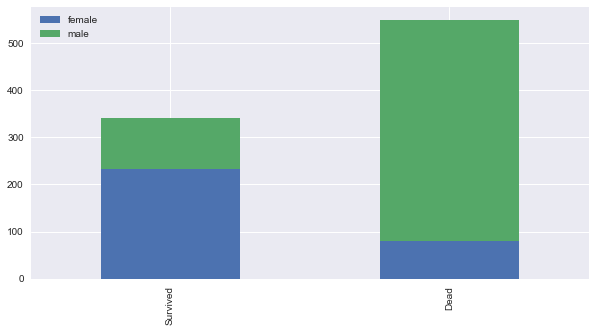

In [68]:
bar_chart('Sex')

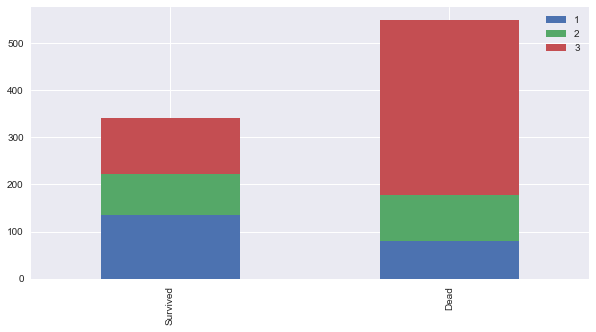

In [69]:
bar_chart('Pclass')

In [70]:
missing_values['Name']

0

In [71]:
# Convert
train_test_data  =[train, test]
for dataset in train_test_data:
     dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [72]:
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Capt          1
Don           1
Mme           1
Jonkheer      1
Countess      1
Lady          1
Sir           1
Name: Title, dtype: int64

In [73]:
traindata=[train_my]
tmap={}
for dataset1 in traindata:
    dataset1['Title']=dataset1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
for i in dataset1['Title']:
    if i =="Mr": 
        tmap[i]=0
    if i=="Miss":
        tmap[i]=1
    if i=="Mrs":
        tmap[i]=2
    else:
        tmap[i]=3
print(tmap)

{'Mr': 3, 'Mrs': 2, 'Miss': 3, 'Master': 3, 'Don': 3, 'Rev': 3, 'Dr': 3, 'Mme': 3, 'Ms': 3, 'Major': 3, 'Lady': 3, 'Sir': 3, 'Mlle': 3, 'Col': 3, 'Capt': 3, 'Countess': 3, 'Jonkheer': 3}


In [74]:
title_mapping={"Mr": 0, 'Miss': 1, 'Mrs': 2, 'Master':3,'Rev':3,'Col':3,'Dr':3,'Don':3,'Ms':3,
               'Countess' :3, 'Major' :3, 'Lady' : 3, 'Mme' : 3, 'Jonkheer':3, 'Mlle' : 3, 'Capt': 3, 'Sir' : 3,'Dona':3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [75]:
test.tail()
test[test.PassengerId==1306]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,3


In [76]:
dataset['Title']
train.Title.head()

0    0
1    2
2    1
3    2
4    0
Name: Title, dtype: int64

In [77]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [78]:
#to delete a column from the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name',axis=1, inplace=True)

In [79]:
test.head()
test['Title']=pd.to_numeric(test['Title'])


In [80]:
sex_mapping={"male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset['Sex']= dataset['Sex'].map(sex_mapping)

In [81]:
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,0,NaN,0,0,359309,8.0500,NaN,S,0
417,1309,3,0,NaN,1,1,2668,22.3583,NaN,C,3


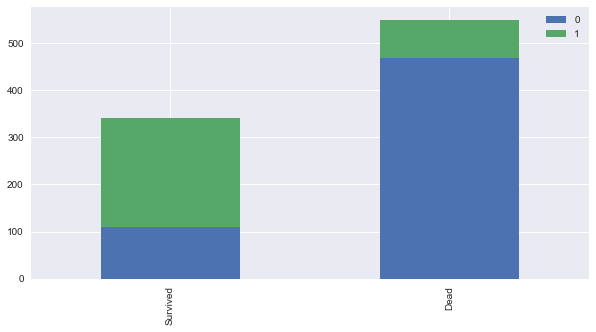

In [82]:
bar_chart('Sex')

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


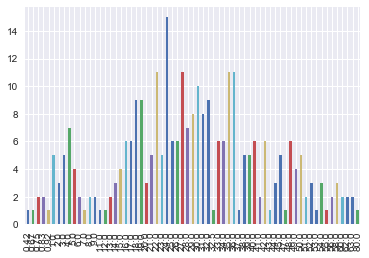

In [84]:
train[train['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar')

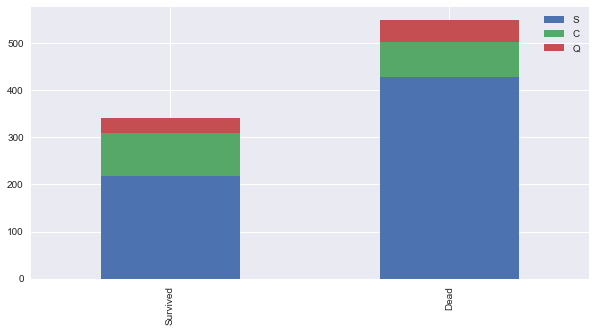

In [85]:
bar_chart('Embarked')


In [86]:
train.shape
train.Title.shape
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [87]:
test.head()
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [90]:
#train['Sex']=np.where(train['Sex']=='female',1,0)
#test['Sex']=np.where(test['Sex']=='female',1,0)

In [91]:
# code to fill the null value in Age column. Groupby the Title and find the median age from it.
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

In [92]:
test.Age.shape

(418,)

In [93]:
missing_values['Age']

177

In [94]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


In [95]:
test.Age.head(15)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10     NaN
11    46.0
12    23.0
13    63.0
14    47.0
Name: Age, dtype: float64

In [96]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [97]:
test.Age.head(15)

0     34.5
1     47.0
2     62.0
3     27.0
4     22.0
5     14.0
6     30.0
7     26.0
8     18.0
9     21.0
10    28.5
11    46.0
12    23.0
13    63.0
14    47.0
Name: Age, dtype: float64

In [98]:
missing_values1['Age']

86

In [99]:
# Binnning Techique, convert the Age column in Bins e.g. child-0, Young-1, Adult-2,mid-age-3, Senior-4
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] =1,
    dataset.loc[(dataset['Age'] >26) & (dataset ['Age'] <=36), 'Age'] =2 ,
    dataset.loc[(dataset['Age'] >36) & (dataset ['Age'] <=62), 'Age'] =3 ,
    dataset.loc[dataset['Age'] >62, 'Age'] =4

In [100]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [101]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


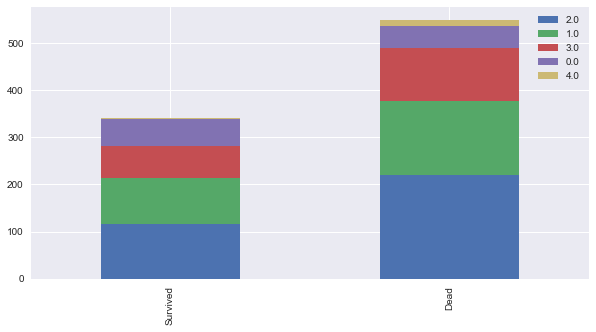

In [102]:
#display bar chart for age after binning
bar_chart('Age')

In [103]:
missing_values['Embarked']

2

In [104]:
train.loc[(train.Pclass==3)&(train.Survived==0)].shape

(372, 12)

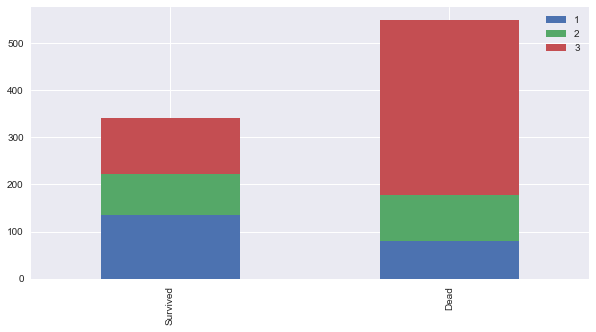

In [105]:
bar_chart('Pclass')

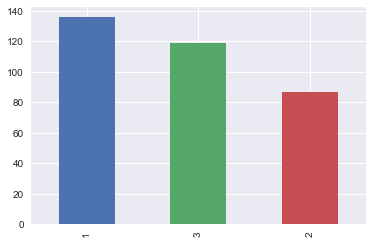

In [106]:
train[train['Survived']==1]['Pclass'].value_counts().plot(kind='bar')

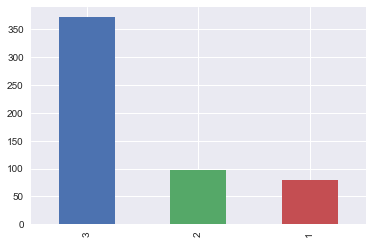

In [107]:
train[train['Survived']==0]['Pclass'].value_counts().plot(kind='bar')

In [108]:
train[['Pclass', 'Ticket', 'Fare', 'Survived']].head()

,Pclass,Ticket,Fare,Survived
0,3,A/5 21171,7.2500,0
1,1,PC 17599,71.2833,1
2,3,STON/O2. 3101282,7.9250,1
3,1,113803,53.1000,1
4,3,373450,8.0500,0


In [109]:
missing_values['Embarked']

2

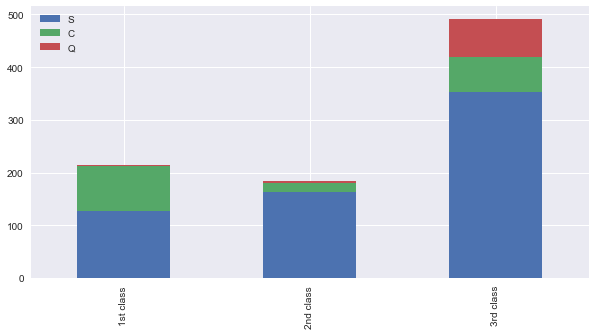

In [110]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [111]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')


In [112]:
missing_values['Embarked']

2

In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [114]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [115]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [116]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [117]:
Embarked_mapping={"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(Embarked_mapping)


In [118]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


In [119]:
train['Fare'].fillna(train.groupby('Pclass')['Age'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [120]:
missing_values1["Fare"]

1

In [121]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <=17, 'Fare']=0,
    dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <=30), 'Fare']= 1,
    dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <=100), 'Fare']= 2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3                     
                                    

In [122]:
train.Fare.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [123]:
train.Cabin.value_counts().head()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
F2             3
Name: Cabin, dtype: int64

In [124]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

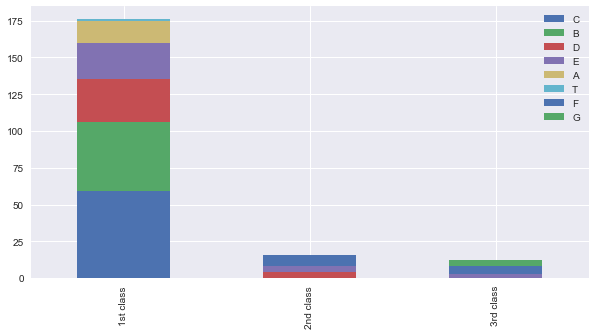

In [125]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [126]:
train[train['Pclass']==1]['Cabin'].value_counts()

C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64

In [127]:
cabin_mapping={"A":0, "B":0.5,"C":1, "D":1.5,"E":2,"F":2.5,"G":3.0,"T":3.5}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [128]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [129]:
train['Familysize']=train['SibSp']+train["Parch"]+1
test['Familysize']=test['SibSp']+test["Parch"]+1

(0, 11.0)

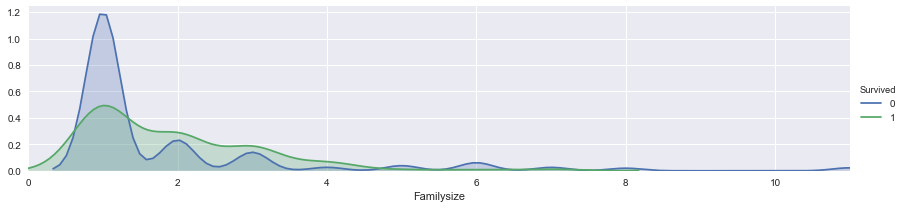

In [130]:
facet=sns.FacetGrid(train, hue='Survived',aspect=4)
facet.map(sns.kdeplot,"Familysize",shade=True)
facet.set(xlim=(0,train["Familysize"].max()))
facet.add_legend()
plt.xlim(0)

In [131]:
#from above graph those who are single or without family are not survived more
Family_mapping={1:0, 2:0.5, 3:1, 4:1.5, 5:2, 6:2.5, 7:3, 8:3.5, 9:4, 10:4.5, 11:5}
for dataset in train_test_data:
    dataset["Familysize"]= dataset["Familysize"].map(Family_mapping)

In [132]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.5,0,0,0.5
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1.0,1,2,0.5
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.5,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,1.0,0,2,0.5
4,5,0,3,0,2.0,0,0,373450,0.0,2.5,0,0,0.0


In [133]:
test.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
413,1305,3,0,2.0,0,0,A.5. 3236,0.0,2.5,0,0,0.0
414,1306,1,1,3.0,0,0,PC 17758,3.0,1.0,1,3,0.0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.5,0,0,0.0
416,1308,3,0,2.0,0,0,359309,0.0,2.5,0,0,0.0
417,1309,3,0,0.0,1,1,2668,1.0,2.5,1,3,1.0


In [134]:
features_drop=['SibSp', 'Parch', 'Ticket']
train=train.drop(features_drop, axis=1)
test=test.drop(features_drop, axis=1)
train=train.drop(['PassengerId'], axis=1)


In [135]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,0,1.0,0.0,2.5,0,0,0.5
1,1,1,1,3.0,2.0,1.0,1,2,0.5
2,1,3,1,1.0,0.0,2.5,0,1,0.0
3,1,1,1,2.0,2.0,1.0,0,2,0.5
4,0,3,0,2.0,0.0,2.5,0,0,0.0


In [136]:
train_data=train.drop('Survived', axis=1)
target=train['Survived']


In [137]:
train_data.head()
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Machine Learning Model

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
Familysize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


### cross validation (K-fold)

In [140]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [141]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,1.0,0.0,2.5,0,0,0.5
1,1,1,3.0,2.0,1.0,1,2,0.5
2,3,1,1.0,0.0,2.5,0,1,0.0
3,1,1,2.0,2.0,1.0,0,2,0.5
4,3,0,2.0,0.0,2.5,0,0,0.0


In [142]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring= 'accuracy'
knn_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(knn_score)

[0.81111111 0.75280899 0.82022472 0.80898876 0.86516854 0.83146067
 0.84269663 0.78651685 0.84269663 0.83146067]


In [143]:
#KNN score
round(np.mean(knn_score)*100,2)


81.93

### Random Forest

In [144]:
clf=RandomForestClassifier(n_estimators=13)
scoring= 'accuracy'
rnd_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(rnd_score)

[0.8        0.79775281 0.82022472 0.78651685 0.88764045 0.79775281
 0.80898876 0.79775281 0.71910112 0.80898876]


In [145]:
# Random Forest score
round(np.mean(rnd_score)*100,2)

80.25

In [146]:
clf=GaussianNB()
scoring= 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [147]:
# Naive Bayes score
round(np.mean(score)*100,2)

78.78

### SVM

In [148]:
clf=SVC()
scoring= 'accuracy'
svm_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(svm_score)

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


In [149]:
# SVM score
round(np.mean(svm_score)*100,2)

83.61

In [150]:
clf = AdaBoostClassifier(n_estimators=13)
scoring= 'accuracy'
ADB_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(ADB_score)

[0.82222222 0.7752809  0.78651685 0.79775281 0.79775281 0.80898876
 0.79775281 0.82022472 0.85393258 0.85393258]


In [151]:
# SVM score
round(np.mean(ADB_score)*100,2)

81.14

In [152]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=3)
scoring= 'accuracy'
DT_score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(DT_score)

[0.76666667 0.80898876 0.75280899 0.76404494 0.87640449 0.7752809
 0.82022472 0.82022472 0.74157303 0.78651685]


In [153]:
# SVM score
round(np.mean(DT_score)*100,2)

79.13

##Testing

In [154]:
clf = SVC()
clf.fit(train_data, target)
test_data = test.drop("PassengerId", axis=1)

prediction = clf.predict(test_data)
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [155]:
submission =pd.DataFrame({
    "PassengerId" : test['PassengerId'],
    "Survived": prediction
})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [156]:
#submitt file to csv
submission.to_csv('submission.csv',index=False)
my=pd.read_csv("submission.csv")
my

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [157]:
test1[test1.PassengerId==1306]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C


In [158]:
test.tail()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
413,1305,3,0,2.0,0.0,2.5,0,0,0.0
414,1306,1,1,3.0,3.0,1.0,1,3,0.0
415,1307,3,0,3.0,0.0,2.5,0,0,0.0
416,1308,3,0,2.0,0.0,2.5,0,0,0.0
417,1309,3,0,0.0,1.0,2.5,1,3,1.0
